# Stoneburner, Kurt
- ## DSC 640 - Week 07/08: 
- ## Exercise 4.2: Scatterplots, Bubble Charts and Density Plots/Maps

These two weeks we are going to be focused on scatterplots, bubble charts, and density plots/maps and using various tools to create these visualizations.

- Kernal Density Estimation - https://jamesmccaffrey.wordpress.com/2021/07/23/example-of-kernel-density-estimation-kde-using-scipy/

In [58]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

out_file_for_print = []

In [59]:
#./wk0708/z_wk07_08_birth-rate.csv
#./wk0708/z_wk07_08_birth-rates-yearly.csv
#./wk0708/z_wk07_08_crimerates-by-state-2005.csv
#./wk0708/z_wk07_08_life-expectancy.csv
#./wk0708/z_wk07_08_tv_sizes.txt

In [60]:
# //*** Birth Rates
br_df = pd.read_csv("./wk0708/z_wk07_08_birth-rate.csv")
br_df

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Aruba,36.400,35.179,33.863,32.459,30.994,29.513,28.069,26.721,25.518,24.492,23.669,23.058,22.627,22.342,22.177,22.111,22.125,22.192,22.281,22.362,22.406,22.390,22.313,22.172,21.958,21.668,21.300,20.869,20.393,19.886,19.363,18.842,18.332,17.839,17.367,16.911,16.457,15.994,15.515,15.024,14.528,14.041,13.579,13.153,12.772,12.441,12.159,11.919,11.716
1,Afghanistan,52.201,52.206,52.208,52.204,52.192,52.168,52.130,52.076,52.006,51.920,51.816,51.691,51.548,51.395,51.239,51.092,50.967,50.871,50.810,50.786,50.795,50.833,50.888,50.951,51.016,51.084,51.156,51.237,51.325,51.417,51.510,51.603,51.690,51.760,51.802,51.804,51.754,51.646,51.472,51.229,50.903,50.486,49.984,49.416,48.803,48.177,47.575,47.023,46.538
2,Angola,54.432,54.394,54.317,54.199,54.040,53.836,53.585,53.296,52.984,52.668,52.376,52.137,51.967,51.875,51.861,51.920,52.033,52.172,52.314,52.444,52.554,52.644,52.721,52.789,52.841,52.880,52.907,52.918,52.903,52.847,52.722,52.490,52.141,51.679,51.123,50.522,49.941,49.427,49.003,48.662,48.355,48.005,47.545,46.936,46.184,45.330,44.444,43.607,42.875
3,Albania,40.886,40.312,39.604,38.792,37.913,37.008,36.112,35.245,34.421,33.655,32.947,32.279,31.630,30.985,30.345,29.723,29.138,28.606,28.139,27.736,27.396,27.114,26.870,26.644,26.417,26.172,25.895,25.579,25.217,24.801,24.325,23.788,23.198,22.562,21.885,21.157,20.364,19.510,18.616,17.713,16.850,16.081,15.444,14.962,14.644,14.485,14.464,14.534,14.649
4,Netherlands Antilles,32.321,30.987,29.618,28.229,26.849,25.518,24.280,23.173,22.230,21.472,20.925,20.605,20.484,20.517,20.664,20.864,21.055,21.190,21.238,21.178,21.008,20.746,20.442,20.138,19.860,19.641,19.514,19.477,19.509,19.586,19.651,19.635,19.489,19.187,18.733,18.157,17.515,16.878,16.301,15.809,15.412,15.096,14.824,14.565,14.309,14.051,13.790,13.532,13.281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Samoa,48.202,47.788,47.226,46.491,45.591,44.558,43.447,42.331,41.270,40.297,39.414,38.599,37.821,37.070,36.367,35.763,35.322,35.081,35.054,35.224,35.573,36.068,36.633,37.180,37.632,37.869,37.773,37.323,36.547,35.502,34.323,33.192,32.263,31.634,31.328,31.302,31.453,31.616,31.655,31.504,31.113,30.462,29.612,28.631,27.563,26.464,25.391,24.391,23.508
230,"Yemen, Rep.",54.501,54.516,54.563,54.645,54.761,54.914,55.100,55.310,55.530,55.749,55.951,56.119,56.246,56.329,56.366,56.365,56.343,56.314,56.281,56.240,56.178,56.079,55.922,55.688,55.363,54.934,54.394,53.747,53.005,52.174,51.255,50.250,49.173,48.043,46.885,45.719,44.560,43.427,42.339,41.322,40.407,39.624,38.973,38.445,38.025,37.686,37.393,37.107,36.795
231,South Africa,42.267,41.993,41.610,41.112,40.520,39.883,39.268,38.734,38.317,38.025,37.837,37.709,37.580,37.400,37.153,36.837,36.467,36.077,35.687,35.302,34.919,34.530,34.119,33.675,33.192,32.659,32.066,31.419,30.729,30.010,29.280,28.562,27.874,27.235,26.658,26.158,25.745,25.409,25.132,24.899,24.684,24.458,24.199,23.897,23.550,23.167,22.770,22.387,22.038
232,Zambia,48.112,48.323,48.533,48.734,48.915,49.061,49.156,49.195,49.175,49.097,48.974,48.821,48.655,48.486,48.312,48.117,47.875,47.570,47.198,46.768,46.304,45.837,45.400,45.019,44.709,44.473,44.301,44.174,44.076,44.005,43.971,43.989,44.066,44.199,44.375,44.570,44.758,44.914,45.015,45.048,45.010,44.907,44.755,44.566,44.340,44.067,43.737,43.341,42.879


In [61]:
# //*** Birth Rates Yearly
bry_df = pd.read_csv("./wk0708/z_wk07_08_birth-rates-yearly.csv")
bry_df

,year,rate
0,1960,36.400
1,1961,35.179
2,1962,33.863
3,1963,32.459
4,1964,30.994
...,...,...
9865,2004,30.123
9866,2005,30.067
9867,2006,30.027
9868,2007,29.987


In [62]:
crbs_df = pd.read_csv("./wk0708/z_wk07_08_crimerates-by-state-2005.csv")
crbs_df = crbs_df.iloc[1:]
crbs_df.corr()

,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
murder,1.000000,0.019347,0.925005,0.673629,0.276312,0.223320,0.674955,0.058586
forcible_rape,0.019347,1.000000,-0.056155,0.379253,0.356518,0.318834,0.139953,-0.163012
robbery,0.925005,-0.056155,1.000000,0.653702,0.229434,0.181704,0.712368,0.248760
aggravated_assault,0.673629,0.379253,0.653702,1.000000,0.547263,0.438468,0.526181,0.135251
burglary,0.276312,0.356518,0.229434,0.547263,1.000000,0.679892,0.411503,0.140597
larceny_theft,0.223320,0.318834,0.181704,0.438468,0.679892,1.000000,0.473116,-0.029444
motor_vehicle_theft,0.674955,0.139953,0.712368,0.526181,0.411503,0.473116,1.000000,0.119971
population,0.058586,-0.163012,0.248760,0.135251,0.140597,-0.029444,0.119971,1.000000


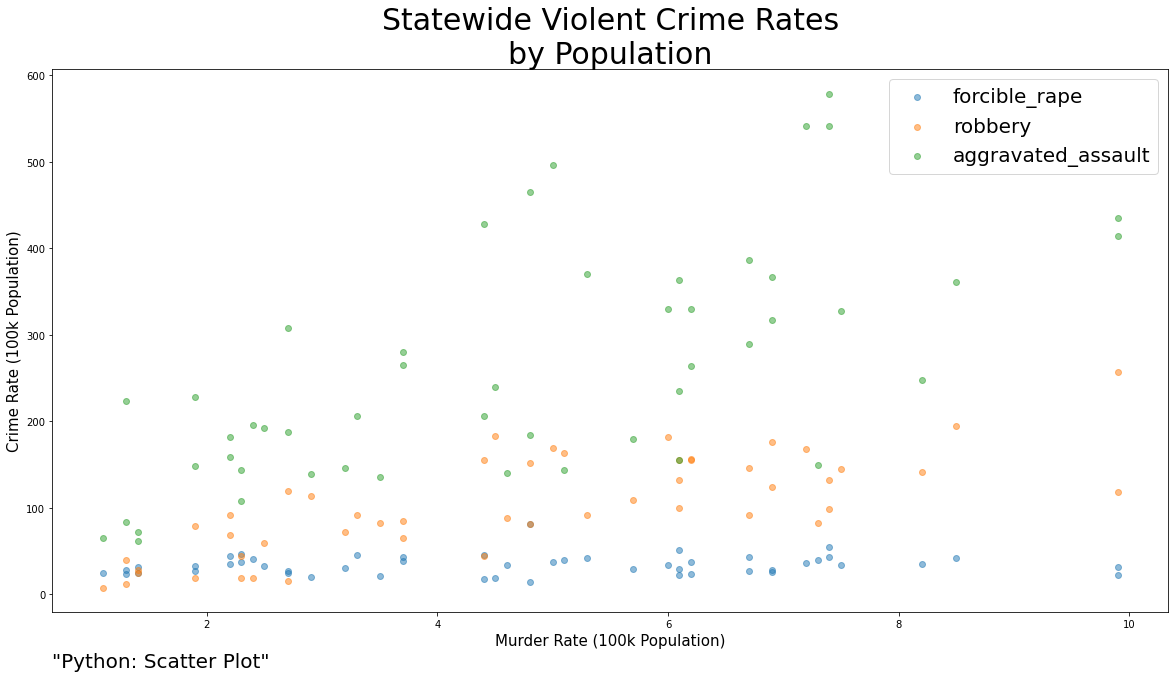

In [63]:
pp = {
    'x_fig' : 20,
    'y_fig' : 10,
    'fontsize' : 20,
}

plot_df = crbs_df.sort_values('murder',ascending=False)
plot_df['population'] = plot_df['population'] / 1000000
plot_df = plot_df[plot_df['murder'] < plot_df['murder'].max() ]

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(pp['x_fig'],pp['y_fig'])

#plot_df['population'] = plot_df['population'] / 1


#col='murder' 
#ax.scatter(plot_df['population'],plot_df[col],
            
#           alpha=1,
#           label=col,
#           color="black",
#          )
col='forcible_rape' 
ax.scatter(plot_df['murder'],plot_df[col],
            alpha=.5,
             label=col,
             #colors=colors_palette,
            )

col='robbery' 
ax.scatter(plot_df['murder'],plot_df[col],
            alpha=.5,
             label=col,
             #colors=colors_palette,
            )


col='aggravated_assault' 
ax.scatter(plot_df['murder'],plot_df[col],
            alpha=.5,
             label=col,
             #colors=colors_palette,
            )


plt.title("Statewide Violent Crime Rates\nby Population",fontsize=30)
#plt.legend()
#plt.legend(reversed(plt.legend().legendHandles), reversed(plot_dict.keys()),loc='upper left')
ax.set_xlabel("Murder Rate (100k Population)",fontsize=15)
ax.set_ylabel("Crime Rate (100k Population)",fontsize=15)
#ax.tick_params(axis='both', labelsize=12)
plt.text(0,-.1,'"Python: Scatter Plot"', size=pp['fontsize'], transform=ax.transAxes)
#plt.text(0,-.1,'"Python: Density Plot"', size=pp['fontsize'], transform=ax.transAxes)

outfilename='output_wk07_08_python_scatter_plot.png'
out_file_for_print.append(outfilename)
fig.savefig(outfilename)
#ax.set_xticklabels(plot_df['population']/1000 000);
plt.legend(fontsize=20)
plt.show()

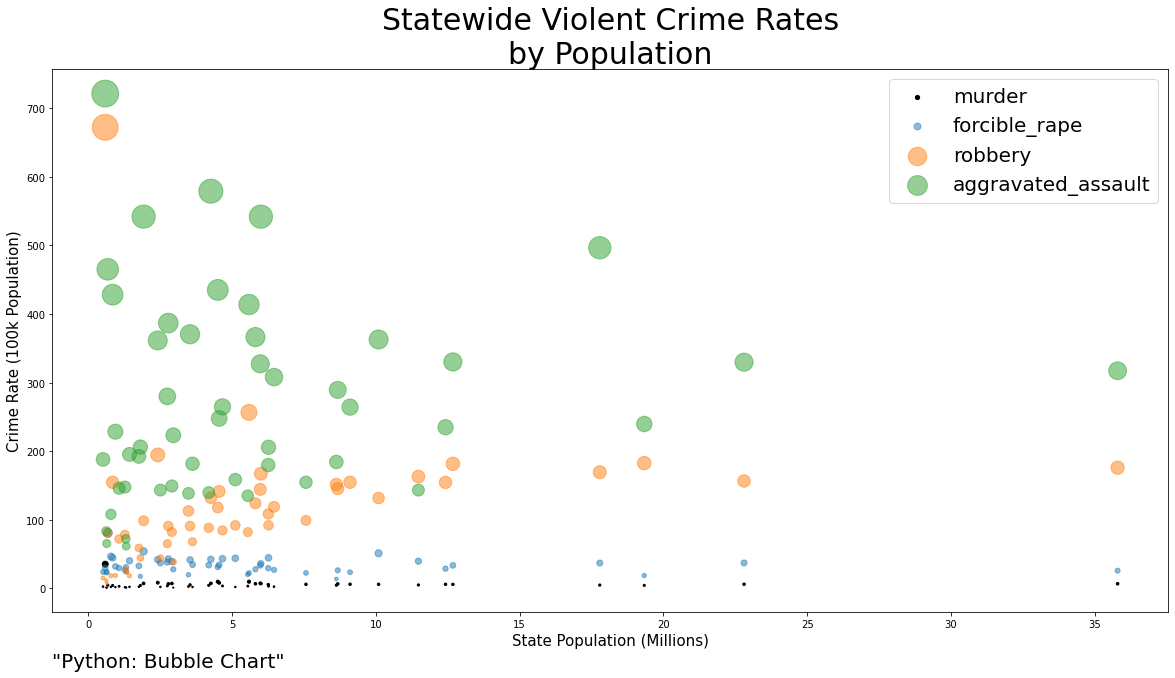

In [64]:
plot_df = crbs_df.sort_values('murder',ascending=False)
plot_df['population'] = plot_df['population'] / 1000000
#print(plot_df)

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(pp['x_fig'],pp['y_fig'])

#plot_df['population'] = plot_df['population'] / 1


col='murder' 
ax.scatter(plot_df['population'],plot_df[col],
           s=plot_df[col], 
           alpha=1,
           label=col,
           color="black",
          )
col='forcible_rape' 
ax.scatter(plot_df['population'],plot_df[col],
           s=plot_df[col], alpha=.5,
             label=col,
             #colors=colors_palette,
            )

col='robbery' 
ax.scatter(plot_df['population'],plot_df[col],
           s=plot_df[col], alpha=.5,
             label=col,
             #colors=colors_palette,
            )


col='aggravated_assault' 
ax.scatter(plot_df['population'],plot_df[col],
           s=plot_df[col], alpha=.5,
             label=col,
             #colors=colors_palette,
            )


plt.title("Statewide Violent Crime Rates\nby Population",fontsize=30)
#plt.legend()
#plt.legend(reversed(plt.legend().legendHandles), reversed(plot_dict.keys()),loc='upper left')
ax.set_xlabel("State Population (Millions)",fontsize=15)
ax.set_ylabel("Crime Rate (100k Population)",fontsize=15)
#ax.tick_params(axis='both', labelsize=12)
plt.text(0,-.1,'"Python: Bubble Chart"', size=pp['fontsize'], transform=ax.transAxes)

outfilename='output_wk07_08_python_bubble_chart.png'
out_file_for_print.append(outfilename)
fig.savefig(outfilename)
#ax.set_xticklabels(plot_df['population']/1000 000);
plt.legend(fontsize=20)
plt.show()

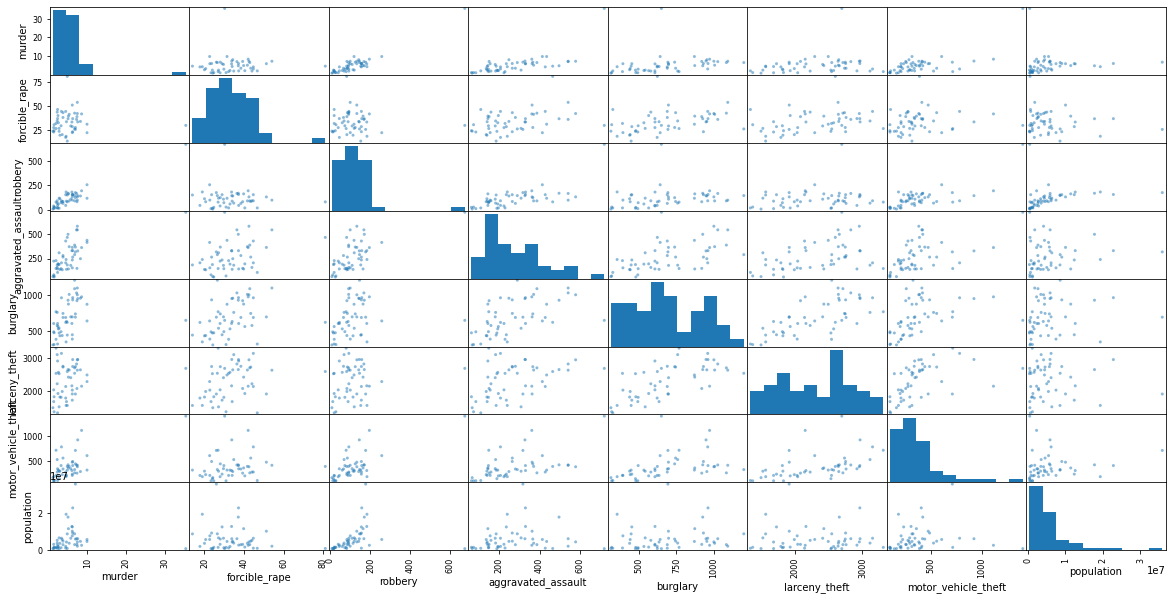

In [65]:
pd.plotting.scatter_matrix(crbs_df)
fig = plt.gcf()
fig.set_size_inches(pp['x_fig'],pp['y_fig'])
plt.show()

In [66]:
le_df = pd.read_csv("./wk0708/z_wk07_08_life-expectancy.csv")
le_df

,country,year,expectancy
0,Afghanistan,2008,42
1,Albania,2008,73
2,Algeria,2008,71
3,Angola,2008,46
4,Antigua and Barbuda,2008,74
...,...,...,...
182,Venezuela (Bolivarian Republic of),2008,75
183,Viet Nam,2008,73
184,Yemen,2008,64
185,Zambia,2008,48


In [67]:
# //*** CODE HERE

tv_df = pd.read_csv("./wk0708/z_wk07_08_tv_sizes.txt",sep='\t')
tv_df = tv_df[tv_df['size'] < 200]

#tv_df['size'].plot.density()

#bry_df['rate'].plot.density()

#bry_df['rate'].plot.kde()

#https://jamesmccaffrey.wordpress.com/2021/07/23/example-of-kernel-density-estimation-kde-using-scipy/
x_data = gaussian_kde(bry_df['rate'])

x_pts = np.linspace(-4, +4, 41)

pdf = x_data.evaluate(x_pts)

bry_df

,year,rate
0,1960,36.400
1,1961,35.179
2,1962,33.863
3,1963,32.459
4,1964,30.994
...,...,...
9865,2004,30.123
9866,2005,30.067
9867,2006,30.027
9868,2007,29.987


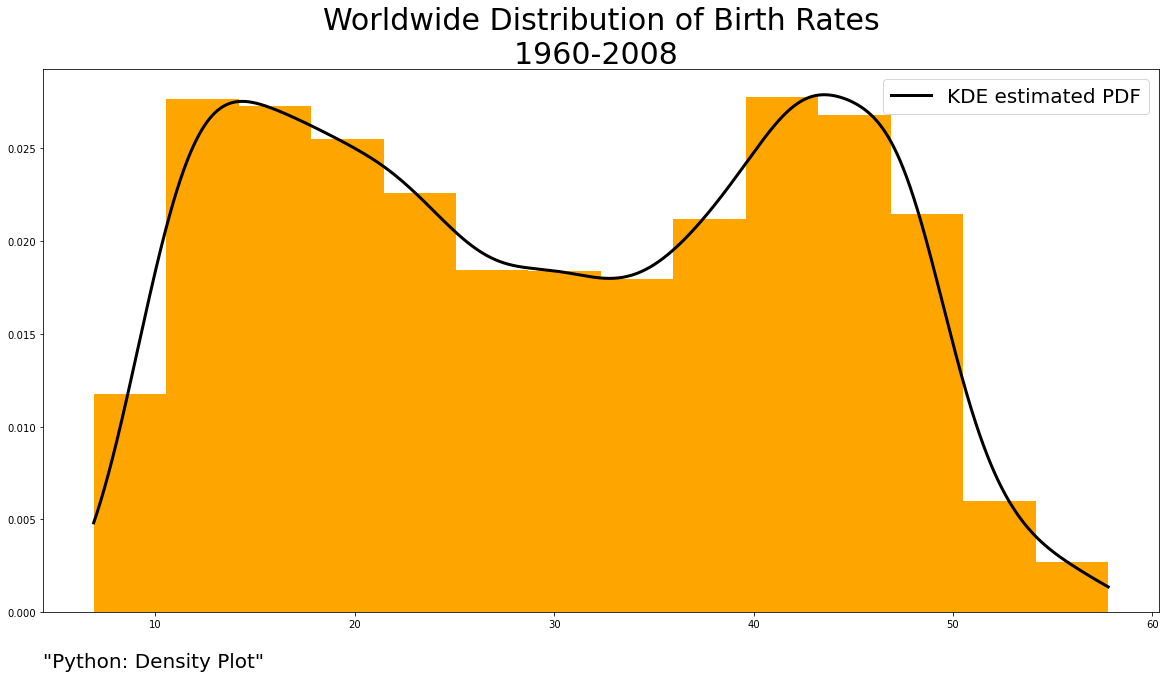

In [68]:


# //*****************************************
# //*** Build a probability mass function
# //*****************************************
# //*** Returns Series as a PMF
# //*****************************************
def build_pmf(input_series):
    output_series = input_series.copy()
    total_values = input_series.sum()
    for value,freq in output_series.items():
        #print(f"{value} {freq} {total_values} {freq/total_values}")
        output_series.loc[value] = freq/total_values
    return output_series

bry_df = bry_df[bry_df['rate'] < 132]
#//*** Build PMF / Density
plot_df = build_pmf(bry_df.value_counts('rate').sort_index())


density = gaussian_kde(bry_df['rate'])

x_pts = np.linspace(bry_df['rate'].min(), bry_df['rate'].max(),  len(bry_df['rate']))

pdf = x_data.evaluate(x_pts)

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(pp['x_fig'],pp['y_fig'])

ax.hist(bry_df['rate'],bins=14,density=1,color='orange',alpha=1)

ax.plot(x_pts,pdf,
             label="KDE estimated PDF",
             color="black",
             linewidth = 3
            )

plt.title("Worldwide Distribution of Birth Rates\n1960-2008 ",fontsize=pp['fontsize']*1.5)

#ax.plot(plot_df.index,plot_df,
#             #label=col,
#             #colors=colors_palette,
#            )


#ax.scatter(plot_df['state'], plot_df['robbery'],
#             label='robbery',
             #colors=colors_palette,
#            )
#plt.title("Household Expenditures: 1984-2008",fontsize=30)
#plt.legend()
#plt.legend(reversed(plt.legend().legendHandles), reversed(plot_dict.keys()),loc='upper left')
#ax.set_ylabel("Expenses ($)",fontsize=15)
#ax.tick_params(axis='both', labelsize=12)
plt.text(0,-.1,'"Python: Density Plot"', size=pp['fontsize'], transform=ax.transAxes)

outfilename='output_wk07_08_python_area_stacked_expenditures.png'
out_file_for_print.append(outfilename)
fig.savefig(outfilename)
plt.legend(fontsize=pp['fontsize'])
plt.show()

In [69]:
br_df

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Aruba,36.400,35.179,33.863,32.459,30.994,29.513,28.069,26.721,25.518,24.492,23.669,23.058,22.627,22.342,22.177,22.111,22.125,22.192,22.281,22.362,22.406,22.390,22.313,22.172,21.958,21.668,21.300,20.869,20.393,19.886,19.363,18.842,18.332,17.839,17.367,16.911,16.457,15.994,15.515,15.024,14.528,14.041,13.579,13.153,12.772,12.441,12.159,11.919,11.716
1,Afghanistan,52.201,52.206,52.208,52.204,52.192,52.168,52.130,52.076,52.006,51.920,51.816,51.691,51.548,51.395,51.239,51.092,50.967,50.871,50.810,50.786,50.795,50.833,50.888,50.951,51.016,51.084,51.156,51.237,51.325,51.417,51.510,51.603,51.690,51.760,51.802,51.804,51.754,51.646,51.472,51.229,50.903,50.486,49.984,49.416,48.803,48.177,47.575,47.023,46.538
2,Angola,54.432,54.394,54.317,54.199,54.040,53.836,53.585,53.296,52.984,52.668,52.376,52.137,51.967,51.875,51.861,51.920,52.033,52.172,52.314,52.444,52.554,52.644,52.721,52.789,52.841,52.880,52.907,52.918,52.903,52.847,52.722,52.490,52.141,51.679,51.123,50.522,49.941,49.427,49.003,48.662,48.355,48.005,47.545,46.936,46.184,45.330,44.444,43.607,42.875
3,Albania,40.886,40.312,39.604,38.792,37.913,37.008,36.112,35.245,34.421,33.655,32.947,32.279,31.630,30.985,30.345,29.723,29.138,28.606,28.139,27.736,27.396,27.114,26.870,26.644,26.417,26.172,25.895,25.579,25.217,24.801,24.325,23.788,23.198,22.562,21.885,21.157,20.364,19.510,18.616,17.713,16.850,16.081,15.444,14.962,14.644,14.485,14.464,14.534,14.649
4,Netherlands Antilles,32.321,30.987,29.618,28.229,26.849,25.518,24.280,23.173,22.230,21.472,20.925,20.605,20.484,20.517,20.664,20.864,21.055,21.190,21.238,21.178,21.008,20.746,20.442,20.138,19.860,19.641,19.514,19.477,19.509,19.586,19.651,19.635,19.489,19.187,18.733,18.157,17.515,16.878,16.301,15.809,15.412,15.096,14.824,14.565,14.309,14.051,13.790,13.532,13.281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Samoa,48.202,47.788,47.226,46.491,45.591,44.558,43.447,42.331,41.270,40.297,39.414,38.599,37.821,37.070,36.367,35.763,35.322,35.081,35.054,35.224,35.573,36.068,36.633,37.180,37.632,37.869,37.773,37.323,36.547,35.502,34.323,33.192,32.263,31.634,31.328,31.302,31.453,31.616,31.655,31.504,31.113,30.462,29.612,28.631,27.563,26.464,25.391,24.391,23.508
230,"Yemen, Rep.",54.501,54.516,54.563,54.645,54.761,54.914,55.100,55.310,55.530,55.749,55.951,56.119,56.246,56.329,56.366,56.365,56.343,56.314,56.281,56.240,56.178,56.079,55.922,55.688,55.363,54.934,54.394,53.747,53.005,52.174,51.255,50.250,49.173,48.043,46.885,45.719,44.560,43.427,42.339,41.322,40.407,39.624,38.973,38.445,38.025,37.686,37.393,37.107,36.795
231,South Africa,42.267,41.993,41.610,41.112,40.520,39.883,39.268,38.734,38.317,38.025,37.837,37.709,37.580,37.400,37.153,36.837,36.467,36.077,35.687,35.302,34.919,34.530,34.119,33.675,33.192,32.659,32.066,31.419,30.729,30.010,29.280,28.562,27.874,27.235,26.658,26.158,25.745,25.409,25.132,24.899,24.684,24.458,24.199,23.897,23.550,23.167,22.770,22.387,22.038
232,Zambia,48.112,48.323,48.533,48.734,48.915,49.061,49.156,49.195,49.175,49.097,48.974,48.821,48.655,48.486,48.312,48.117,47.875,47.570,47.198,46.768,46.304,45.837,45.400,45.019,44.709,44.473,44.301,44.174,44.076,44.005,43.971,43.989,44.066,44.199,44.375,44.570,44.758,44.914,45.015,45.048,45.010,44.907,44.755,44.566,44.340,44.067,43.737,43.341,42.879


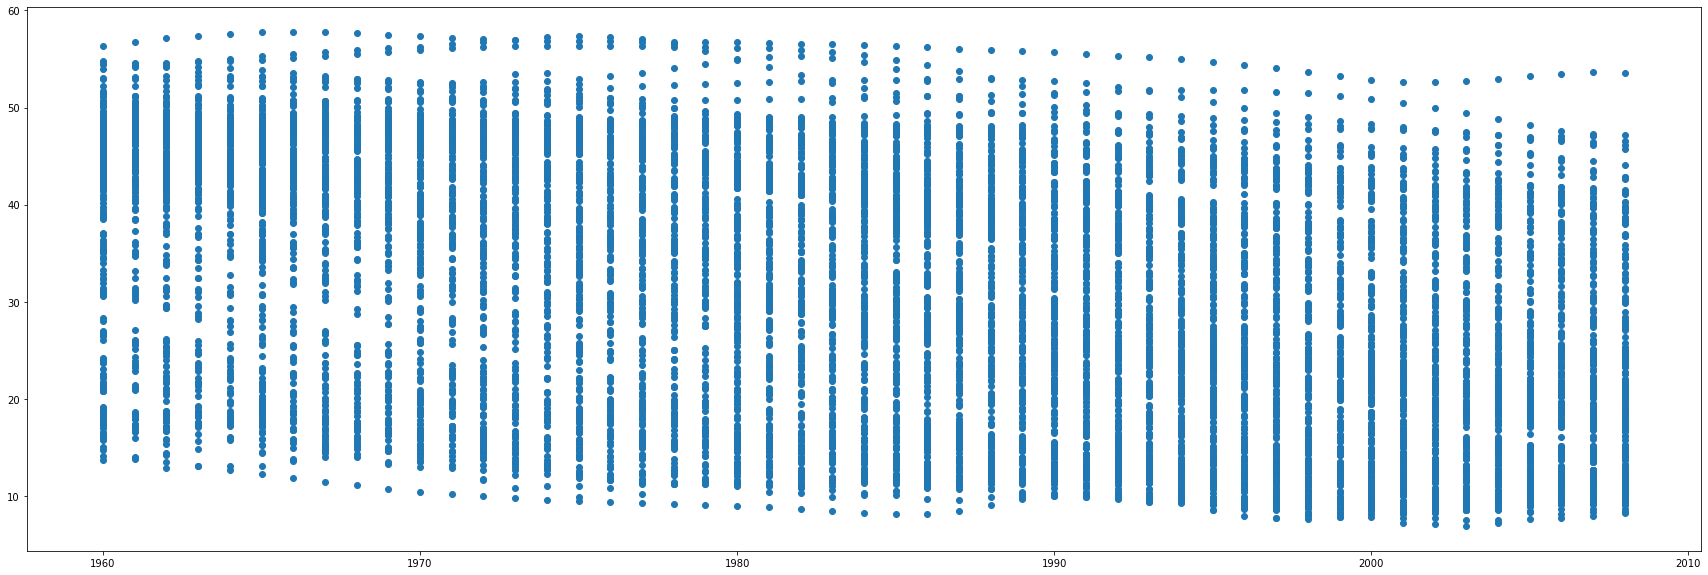

In [70]:
plot_df = bry_df[bry_df['rate'] < 132]



pp = {
    'x_fig' : 30,
    'y_fig' : 10,
}
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(pp['x_fig'],pp['y_fig'])

ax.scatter(plot_df['year'],plot_df['rate'],
             #label=col,
             #colors=colors_palette,
            )


#ax.scatter(plot_df['state'], plot_df['robbery'],
#             label='robbery',
             #colors=colors_palette,
#            )
#plt.title("Household Expenditures: 1984-2008",fontsize=30)
#plt.legend()
#plt.legend(reversed(plt.legend().legendHandles), reversed(plot_dict.keys()),loc='upper left')
#ax.set_ylabel("Expenses ($)",fontsize=15)
#ax.tick_params(axis='both', labelsize=12)
#plt.text(0,-.1,'"Python: Stacked Area Chart"', size=pp['fontsize'], transform=ax.transAxes)

#outfilename='output_wk05_06_python_area_stacked_expenditures.png'
#out_file_for_print.append(outfilename)
#fig.savefig(outfilename)
#ax.set_xticklabels(plot_df['country'],rotation=90);
#plt.legend()
plt.show()

In [71]:
#//*** Print filenames for HTML Conversion pipeline dictionary
for file in out_file_for_print:
    
    print(f"'{file.split('.')[0]}' : '{file}',")

'output_wk07_08_python_scatter_plot' : 'output_wk07_08_python_scatter_plot.png',
'output_wk07_08_python_bubble_chart' : 'output_wk07_08_python_bubble_chart.png',
'output_wk07_08_python_area_stacked_expenditures' : 'output_wk07_08_python_area_stacked_expenditures.png',
